# ANN Forward Propagation Explained

Using the housing data from https://bit.ly/Chatyfy i will explain Artificial Neural Network Forward Propagation and how it works.

Forward Propagation explains how the input values are propagated through the network until the output value is derived by multiplying the input matrix values with the weight matrix values and it involves three steps:

1. **Step 1**: Calculate the summation of the product of inputs and their weights at each of the neurons in the hidden layer, we call this $Z^{(2)}$
2. **Step 2**: Apply the activation function to $Z^{(2)}$ to get $a^{(2)}$
3. **Step 3**: calculate the summation of the product of hidden layer values and their weights to get $z^{3}$
4. **Step 4**: Apply the activation function again to $Z^{3}$ to get the desired outcome $\widehat{y}$  

## Problem Statement

Assuming you wish to be able to predict the number of move-ins in an estate given the number of move outs and the number of rooms.

## Workbench

In [9]:
#Import the required libraries
import pandas as pd
import numpy as np

# Import library to perform one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

#Import Visualization LIbraries
import matplotlib.pyplot as plt

In [3]:
# Import the dataset
move_in_move_out_df = pd.read_csv("data/move_ins_prediction_based_on_move_outs.csv", engine="python")
move_in_move_out_df

,Move-Out,Number of Rooms,Move-In
0,3,1,2
1,1,2,1
2,4,3,3
3,8,1,8
4,3,2,1
5,12,3,5


In [4]:
X = np.array(([3,1],[1,2],[4,3],[8,1],[3,2],[12,3]),dtype=float)
Y = np.array(([2],[1],[3],[8],[1],[5]),dtype=float)

In [5]:
# This forms the input matrix X which is a 6 x 2 matrix
X

array([[ 3.,  1.],
       [ 1.,  2.],
       [ 4.,  3.],
       [ 8.,  1.],
       [ 3.,  2.],
       [12.,  3.]])

In [6]:
# THis forms the output matrix which is a 6 X 1 matrix
Y

array([[2.],
       [1.],
       [3.],
       [8.],
       [1.],
       [5.]])

**Notes:**
1. This problem being solved in this cases is a supervised regression problem
2. Given an input of (5,2) meaning 5 move-outs and number of rooms can we tell the number of anticipated move-ins
3. All inputs are in integers as well as the output so no needs of scaling in order to standardize the units of data

### Our Neural Net

1. Inputs - Count of Move-Outs, Number of Bedrooms will form the input layer
2. Prediction - Number of move-ins will form the predicted value y-hat
3. Layers - We will use one hidden layer with three neurons

![title](images/move_in_prediction_nn.png)

4. We will use a sigmoid activation function
![title](images/neurons_activation_function.png)

5. Between Layer 1 and Hidden Layer we have six connectors which we shall label as 
   1. $W_{11}$ - This connects the first input value $X_{1}$ to the first neuron of the hidden layer say $n_{1}$
   2. $W_{12}$ - This connects the first input value $X_{1}$ to the second neuron of the hidden layer say $n_{2}$
   3. $W_{13}$ - This connects the first input value $X_{1}$ to the third neuron of the hidden layer say $n_{3}$
   4. $W_{21}$ - This connects the second input value $X_{2}$ to the first neuron of the hidden layer say $n_{1}$
   5. $W_{22}$ - This connects the second input value $X_{2}$ to the second neuron of the hidden layer say $n_{2}$
   6. $W_{23}$ - This connects the second input value $X_{2}$ to the third neuron of the hidden layer say $n_{3}$
   
   **Step 1** : 
   Create a new Matrix of values of each of the neurons of the hidden layer by multiplying the input layer value by the 
   connection weight at each hidden layer neuron to get the below values
   
   1. $n_{1}$ = 3$W_{11}$ + 1$W_{21}$
   2. $n_{2}$ = 1$W_{12}$ + 2$W_{22}$
   3. $n_{3}$ = 4$W_{13}$ + 3$W_{23}$
   4. $n_{4}$ = 8$W_{14}$ + 1$W_{24}$
   5. $n_{5}$ = 3$W_{15}$ + 2$W_{25}$
   6. $n_{i}$ = 12$W_{16}$ + 3$W_{26}$
   
   
   -  The input matrix is a 6 x 2 matrix which we shall refer to as **X**
   -  The weight matrix is a 2 x 6 matrix which we shall refer to as $W^{1}$ (This is the input layer weight )
   -  The output matrix will be a 6 x 6 matrix which we shall refer to as $Z^{2}$ (this is the activity of second layer of the network i.e. the results of the multiplication of the input layer matrix with the weights matrix )
   
   The matrix multiplication is as below:
   ![title](images/matrix_multiplication.jpeg)
   

The first derived formula for forward propagation is $Z^{2}$ = X$W^{1}$
![title](images/first_derived_formula.png)

**Step 2:** - We then need to apply the activation function to each entry in Matrix $Z^{2}$ using a python method called sigmoid because we are using a sigmoid as our activation function

In [7]:
def sigmoid(z):
    #Apply the sigmoid activation function
    return 1/(1+np.exp(-z))

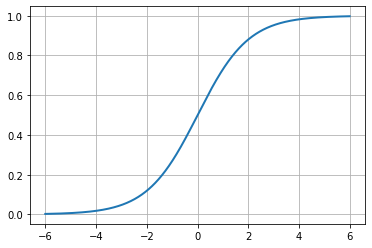

In [14]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput,sigmoid(testInput),linewidth=2,scalex=True)
plt.grid()

The second derived formula for forward propagation is $a^{2}$ = f($Z^{2}$)


**Step 3**: Multiple the values of $a^{2}$ by the hidden layer weights $W^{2}$ 

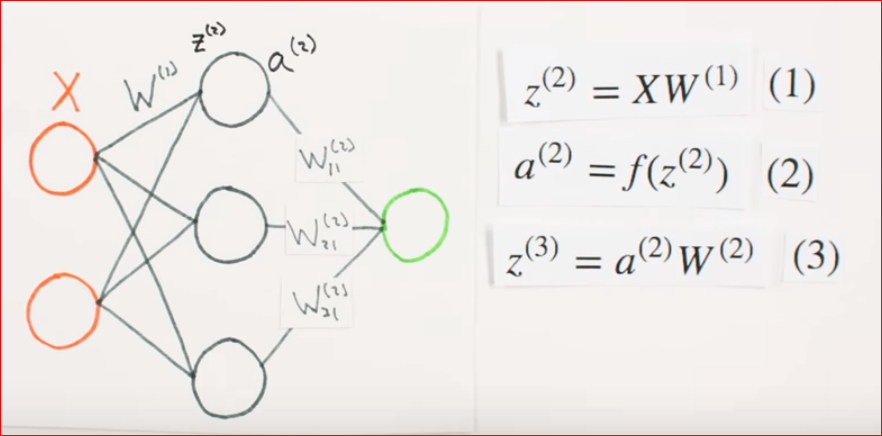

**Step 4**: Apply the activation function again to $Z^{3}$ to get the desired outcome $\widehat{y}$  

![title](images/forward_propagation.png)

### Back Propagation in python 

In [16]:
# Neural Net Class
class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2 # This basically means we have two inputs
        self.outputLayerSize = 1 # This is the anticipated output layer
        self.hiddenLayerSize = 3 # This is the number of neurons in the hiddenLayer
        
        # This will take care of moving the data through the network. Instead of passing inputs to the network one at a time we will
        # use matrices to pass all inputs at once which helps in big computational speed-ups
        # The forward function will propagate the inputs through the network

        # Define the weights
        # Define the starting values which are random numbers
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize )
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize )
    
    def forward(self,X):
        #Propagate the inputs through the network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self,z):
        #Apply the sigmoid activation function to scalar or vector or matrix
        return 1/(1+np.exp(-z))

**Using our Python Class**

In [17]:
NN = Neural_Network()

In [18]:
yHat = NN.forward(X) # The X matrix passed earlier on

In [19]:
yHat

array([[0.64989905],
       [0.64163438],
       [0.63471172],
       [0.62699186],
       [0.64351074],
       [0.61052375]])